In [1]:
import pandas as pd # perhaps importing pandas as urso_polar would be better
import filters as ft
import numpy as np

data = pd.read_csv('crimes.csv')
data.shape

(1456714, 23)

In [2]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [4]:
obj_data = data.select_dtypes(include=['object']).copy()
'separate block'
obj_data[:5]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
0,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,08B,05/10/2016 03:56:50 PM,"(41.864073157, -87.706818608)"
1,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,08B,05/10/2016 03:56:50 PM,"(41.782921527, -87.60436317)"
2,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,24,05/10/2016 03:56:50 PM,"(41.894908283, -87.758371958)"
3,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,08B,05/10/2016 03:56:50 PM,"(41.885686845, -87.749515983)"
4,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,06,05/10/2016 03:56:50 PM,"(41.886297242, -87.761750709)"


In [5]:
data['Latitude'].head()

0    41.864073
1    41.782922
2    41.894908
3    41.885687
4    41.886297
Name: Latitude, dtype: float64

In [6]:
# print(data)
# data.dtypes

Removing unusable atributtes

In [7]:
data = data.drop(columns = ['Unnamed: 0', 'ID', 'X Coordinate', 'Y Coordinate', 'Description', 'Location', 'Case Number'])
data.shape

(1456714, 16)

In [8]:
print(data.shape)

(1456714, 16)


Removing objects with NaN values:

In [9]:
data = ft.nan_filter(data)
# data.isna().sum()

23307424
22693840


In [10]:
print(data.shape)

(1418365, 16)


In [11]:
data[['Calendar','Hour', 'AM/PM']] = data['Date'].str.split(pat = " ", expand=True)
data[['Month','Day', 'Year']] = data['Calendar'].str.split(pat = "/", expand=True)
data[['Hour', 'Minute', 'Second']] = data['Hour'].str.split(pat = ":", expand=True)
data = data.drop(columns = ['Date', 'Calendar', 'Second'])
data.head()
# data = ft.obj_filter(data)

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Hour,AM/PM,Month,Day,Minute
0,013XX S SAWYER AVE,0486,BATTERY,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,11,PM,05,03,40
1,061XX S DREXEL AVE,0486,BATTERY,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,09,PM,05,03,40
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,STREET,False,False,1524,15.0,37.0,25.0,24,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,11,PM,05,03,31
3,049XX W FULTON ST,0460,BATTERY,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,10,PM,05,03,10
4,003XX N LOTUS AVE,0820,THEFT,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,10,PM,05,03,00


Converting some string values to integer:

In [12]:
for column in ['Hour', 'Minute', 'Month', 'Day', 'Year']:
    data[column] = data[column].apply(lambda x: int(x))

Converting some boolean values to integer (True, False) -> (1, 0):

In [13]:
data['Arrest'] = data['Arrest'].apply(lambda x: 1 if x else 0)
data['Domestic'] = data['Domestic'].apply(lambda x: 1 if x else 0)

#converting hour from AM/PM format to 24h format, so we can drop AM/PM column
data['Hour'] += np.where(data['AM/PM'] == 'PM', 12, 0)
data = data.drop(columns = ['AM/PM'])


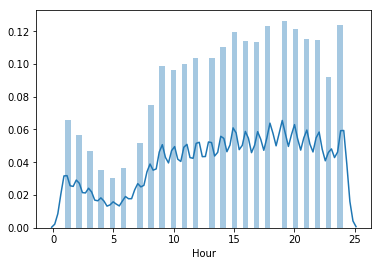

In [40]:
import seaborn as sns
sns.distplot(data['Hour'])

In [14]:
# data = ft.normalization(data)

In [19]:
data.head()

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude,Hour,Month,Day,Minute
0,013XX S SAWYER AVE,0486,BATTERY,APARTMENT,1,1,1022,10.0,24.0,29.0,08B,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,23,5,3,40
1,061XX S DREXEL AVE,0486,BATTERY,RESIDENCE,0,1,313,3.0,20.0,42.0,08B,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,21,5,3,40
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,STREET,0,0,1524,15.0,37.0,25.0,24,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,23,5,3,31
3,049XX W FULTON ST,0460,BATTERY,SIDEWALK,0,0,1532,15.0,28.0,25.0,08B,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,22,5,3,10
4,003XX N LOTUS AVE,0820,THEFT,RESIDENCE,0,1,1523,15.0,28.0,25.0,06,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,22,5,3,0


Remaining string values analysis:

In [32]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column+' unique values:', len(data[column].unique()))

Block unique values: 32546
IUCR unique values: 363
Primary Type unique values: 33
Location Description unique values: 140
FBI Code unique values: 26
Updated On unique values: 950


In [33]:
data['Primary Type'].value_counts()

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [34]:
data['FBI Code'].value_counts()

06     321950
08B    222985
14     152812
26     134434
18     125756
05      81668
08A     66797
07      59856
11      59250
03      56092
04B     35956
04A     23380
24      17080
15      17070
10       7781
16       7585
02       6756
20       6302
17       5387
01A      2578
19       2214
09       2158
22       1928
13        393
12        185
01B        12
Name: FBI Code, dtype: int64